In [20]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [21]:
lenna = r"ronaldo.jpg"
star = r"ronaldo.jpg"

In [22]:
# Đọc ảnh
def read_image_as_nparray(img_path):
    return np.array(Image.open(img_path))    

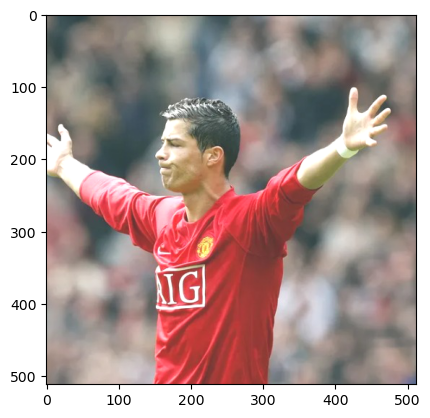

In [23]:
# 1. Thay đổi độ sáng cho ảnh
def adjust_brightness(img_path, alpha):
    img = read_image_as_nparray(img_path) + float(alpha)
    img = np.clip(img, 0, 255)
    return Image.fromarray(img.astype(np.uint8))

alpha = 50
img = adjust_brightness(lenna, alpha)
plt.imshow(img)
#img.save(r"../Output/brightness_" + str(alpha) + ".png")

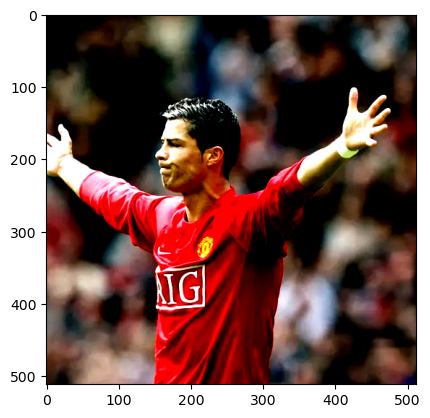

In [24]:
# 2. Thay đổi độ tương phản
def adjust_contrast(img_path, alpha):
    f = (259 * (255 + alpha)) / (255 * (259 - alpha))
    img = read_image_as_nparray(img_path) * float(f) - 128 * f + 128
    img = np.clip(img, 0, 255)
    return Image.fromarray(img.astype(np.uint8))

alpha = 100
img = adjust_contrast(lenna, alpha)
plt.imshow(img)
#img.save(r"../Output/contrast_" + str(alpha) + ".png")

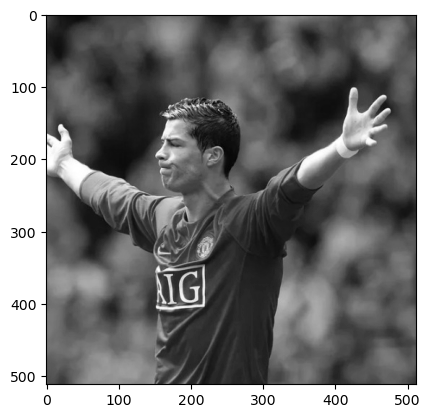

In [25]:
# 3. Chuyển đổi ảnh RGB thành ảnh xám
def convert_to_grayscale(img_path):
    img = read_image_as_nparray(img_path) @ np.array([0.3, 0.59, 0.11])
    return Image.fromarray(img.astype(np.uint8))
    
img = convert_to_grayscale(lenna)
plt.imshow(img, cmap='gray')
#img.save(r"../Output/grayscale.png")

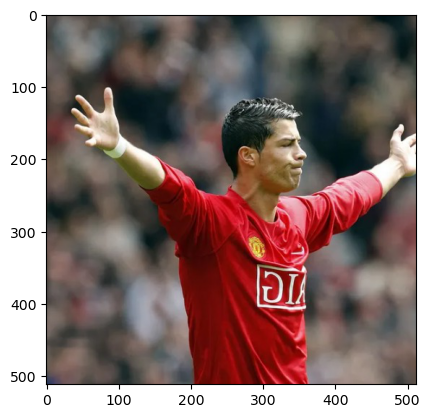

In [26]:
# 4.1. Lật ảnh ngang
def flip_horizontally(img_path):
    return Image.fromarray(np.flip(read_image_as_nparray(img_path), axis=1))
    
img = flip_horizontally(lenna)
plt.imshow(img)
#img.save(r"../Output/flip_hor.png")

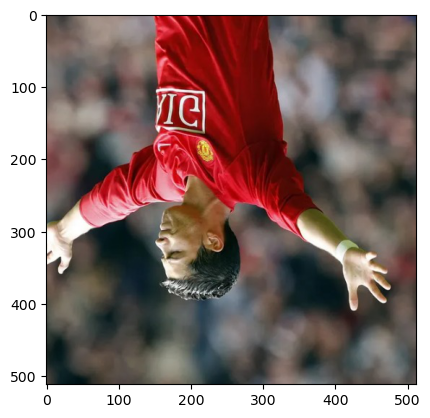

In [27]:
# 4.2. Lật ảnh dọc
def flip_vertically(img_path):
    return Image.fromarray(np.flip(read_image_as_nparray(img_path), axis=0))
    
img = flip_vertically(lenna)
plt.imshow(img)
#img.save(r"../Output/flip_ver.png")

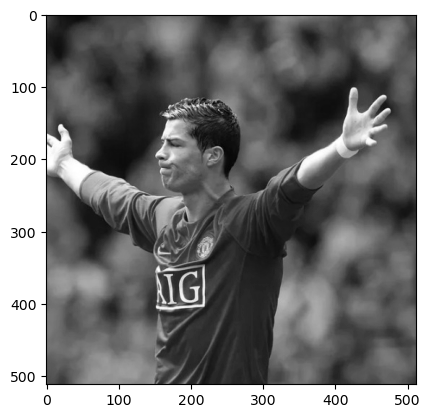

In [28]:
# 5. Chồng 2 ảnh cùng kích thước: chỉ làm trên ảnh xám
def blend(img_path_1, img_path_2, weight_1=0.5):
    weight_2 = 1 - weight_1
    img = np.array(convert_to_grayscale(img_path_1)) * weight_1\
        + np.array(convert_to_grayscale(img_path_2)) * weight_2
    return Image.fromarray(img.astype(np.uint8))


weight_1 = 0.5
img = blend(lenna, star, weight_1)
plt.imshow(img, cmap='gray')
#img.save(r"../Output/blend_" + str(weight_1) + ".png")


[[[0.0625]
  [0.125 ]
  [0.0625]]

 [[0.125 ]
  [0.25  ]
  [0.125 ]]

 [[0.0625]
  [0.125 ]
  [0.0625]]]


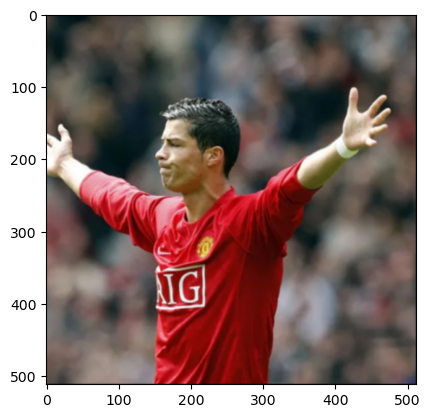

In [29]:
# 6. Làm mờ ảnh (Gaussian blur 3×3)
def blur(img_path):
    kernel = np.array([[[1], [2], [1]],
                       [[2], [4], [2]],
                       [[1], [2], [1]]]) / 16
    
    print(kernel)
    img = read_image_as_nparray(img_path)
    temp = np.zeros((img.shape[0] + 2, img.shape[1] + 2, img.shape[2]))
    temp[1:-1,1:-1,:] = img
    
    for col in range(0, img.shape[0]):
        for row in range(0, img.shape[1]):
            img[col][row] = (temp[col:col+3, row:row+3] * kernel).sum(axis=1).sum(axis=0)
            
    return Image.fromarray(img.astype(np.uint8))

img = blur(lenna)
plt.imshow(img)
#img.save(r"../Output/blur.png")